In [225]:
import numpy as np
import pandas as pd

import matplotlib as mtp

In [226]:
match = pd.read_csv('D:\Chashira\Projects\IPL Winning Probability Prediction\matches.csv')
delivery = pd.read_csv('D:\Chashira\Projects\IPL Winning Probability Prediction\deliveries.csv')

In [227]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [228]:
match.shape   # 756 matches were held

(756, 18)

In [229]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [230]:
total_score_df = delivery.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()

total_score_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [231]:
total_score_df_1 = total_score_df[total_score_df['inning'] == 1]
total_score_df_1

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [232]:
match_df = match.merge(total_score_df_1[['match_id', 'total_runs']], left_on = 'id', right_on = 'match_id')
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [233]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [235]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Gujarat Titans',
    'Lucknow Super Giants'
    ]

In [236]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].str.replace('Rising Pune Supergiants', 'Gujarat Titans')
match_df['team2'] = match_df['team2'].str.replace('Rising Pune Supergiants', 'Gujarat Titans')

match_df['team1'] = match_df['team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
match_df['team2'] = match_df['team2'].str.replace('Gujarat Lions', 'Gujarat Titans')

match_df['team1'] = match_df['team1'].str.replace('Kochi Tuskers Kerala', 'Lucknow Super Giants')
match_df['team2'] = match_df['team2'].str.replace('Kochi Tuskers Kerala', 'Lucknow Super Giants')

match_df['team1'] = match_df['team1'].str.replace('Pune Warriors', 'Lucknow Super Giants')
match_df['team2'] = match_df['team2'].str.replace('Pune Warriors', 'Lucknow Super Giants')

In [237]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [238]:
match_df.shape

(740, 20)

In [239]:
match_df['dl_applied'].value_counts()  # dl -> Duckworth Lewis

dl_applied
0    721
1     19
Name: count, dtype: int64

In [240]:
match_df = match_df[match_df['dl_applied'] == 0]
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Titans,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Titans,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN,6,135
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [241]:
match_df = match_df[['match_id', 'city', 'winner', 'total_runs']]
match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
2,3,Rajkot,Kolkata Knight Riders,183
4,5,Bangalore,Royal Challengers Bangalore,157
5,6,Hyderabad,Sunrisers Hyderabad,135
6,7,Mumbai,Mumbai Indians,178
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,143
752,11412,Chennai,Mumbai Indians,136
753,11413,Visakhapatnam,Delhi Capitals,171
754,11414,Visakhapatnam,Chennai Super Kings,155


In [242]:
delivery_df = match_df.merge(delivery, on = 'match_id')
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172037,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
172038,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
172039,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
172040,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [243]:
delivery_df_2 = delivery_df[delivery_df['inning'] == 2]

In [244]:
delivery_df_2.shape

(83207, 24)

In [245]:
delivery_df_2.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
172037,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
172038,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
172039,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
172040,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN
172041,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [246]:
delivery_df_2['total_runs_y'].dtype

dtype('int64')

In [247]:
# Creating a new column 'Current Score'

delivery_df_2['total_runs_y'] = delivery_df_2['total_runs_y'].astype(int)
delivery_df_2['current_score'] = delivery_df_2.groupby('match_id')['total_runs_y'].cumsum()

delivery_df_2.tail()


# delivery_df_2['current_score'] = delivery_df_2.groupby('match_id').cumsum()['total_runs_y']

# delivery_df_2.tail()

C:\Users\User\AppData\Local\Temp\ipykernel_17224\2730867140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df_2['total_runs_y'] = delivery_df_2['total_runs_y'].astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_17224\2730867140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df_2['current_score'] = delivery_df_2.groupby('match_id')['total_runs_y'].cumsum()


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
172037,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,1,0,1,NaN,NaN,NaN,152
172038,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,2,0,2,NaN,NaN,NaN,154
172039,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155
172040,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,2,0,2,NaN,NaN,NaN,157
172041,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,0,0,0,0,SN Thakur,lbw,NaN,157


In [248]:
# Creating a new column required 'Runs Left' 
delivery_df_2['runs_left'] = delivery_df_2['total_runs_x'] - delivery_df_2['current_score']

delivery_df_2.tail()

C:\Users\User\AppData\Local\Temp\ipykernel_17224\928086203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df_2['runs_left'] = delivery_df_2['total_runs_x'] - delivery_df_2['current_score']


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
172037,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,152,0
172038,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,154,-2
172039,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-3
172040,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,157,-5
172041,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,0,0,0,SN Thakur,lbw,NaN,157,-5


In [249]:
# Creating the column 'balls left'
delivery_df_2['balls_left'] = 126 - (delivery_df_2['over'] * 6 + delivery_df_2['ball'])

delivery_df_2.tail()

C:\Users\User\AppData\Local\Temp\ipykernel_17224\728266745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df_2['balls_left'] = 126 - (delivery_df_2['over'] * 6 + delivery_df_2['ball'])


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
172037,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
172038,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
172039,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
172040,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1
172041,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,0,0,SN Thakur,lbw,NaN,157,-5,0


In [250]:
# import pandas as pd

# # Assuming 'player_dismissed' is the column for which you want to compute cumulative sum
# delivery_df_2['player_dismissed'] = delivery_df_2['player_dismissed'].fillna(0).astype(int)
# delivery_df_2['player_dismissed'] = delivery_df_2['player_dismissed'].apply(lambda x:x if x == '0' else '1')

# # Compute the cumulative sum using pandas groupby and cumsum
# wickets = delivery_df_2.groupby('match_id')['player_dismissed'].cumsum()

# # Calculate 'wickets_left'
# delivery_df_2['wickets_left'] = 10 - wickets
# delivery_df_2.tail()


In [251]:
delivery_df_2['match_id'].dtype

dtype('int64')

In [252]:
# delivery_df_2['player_dismissed'] = delivery_df_2['player_dismissed'].fillna("0")
# delivery_df_2['player_dismissed'] = delivery_df_2['player_dismissed'].apply(lambda x:x if x == '0' else '1')
# delivery_df_2['player_dismissed'] = delivery_df_2['player_dismissed'].astype(int)

# delivery_df_2['match_id'] = delivery_df_2['match_id'].astype(int)

# wickets = delivery_df_2.groupby('match_id').cumsum()['player_dismissed'].values

# delivery_df_2['wickets'] = 10 - wickets
# delivery_df_2.tail()

In [253]:
delivery_df_2['player_dismissed'] = delivery_df_2['player_dismissed'].fillna("0")
delivery_df_2['player_dismissed'] = delivery_df_2['player_dismissed'].apply(lambda x: int(x) if x == '0' else int('1'))

# Print unique values and dtype
print(delivery_df_2['player_dismissed'].unique())
print(delivery_df_2['player_dismissed'].dtype)

delivery_df_2['match_id'] = delivery_df_2['match_id'].astype(int)

wickets = delivery_df_2.groupby('match_id')['player_dismissed'].cumsum().values

delivery_df_2['wickets_left'] = 10 - wickets
delivery_df_2.tail()


[0 1]
int64


C:\Users\User\AppData\Local\Temp\ipykernel_17224\1085246760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df_2['player_dismissed'] = delivery_df_2['player_dismissed'].fillna("0")
C:\Users\User\AppData\Local\Temp\ipykernel_17224\1085246760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df_2['player_dismissed'] = delivery_df_2['player_dismissed'].apply(lambda x: int(x) if x == '0' else int('1'))
C:\Users\User\AppData\Local\Temp\ipykernel_17224\1085246760.py:8: SettingWithCopyWarni

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
172037,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,0,4,5
172038,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-2,3,5
172039,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-3,2,4
172040,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-5,1,4
172041,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,0,1,lbw,NaN,157,-5,0,3


In [254]:
delivery_df_2.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [255]:
# Current Run Rate = Runs/ Overs
delivery_df_2['crr'] = (delivery_df_2['current_score']) / ((120 - delivery_df_2['balls_left']) /6)   # ((120 - delivery_df_2['balls_left']) /6) -> Overs
delivery_df_2.tail()

C:\Users\User\AppData\Local\Temp\ipykernel_17224\3143277588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df_2['crr'] = (delivery_df_2['current_score']) / ((120 - delivery_df_2['balls_left']) /6)   # ((120 - delivery_df_2['balls_left']) /6) -> Overs


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr
172037,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,NaN,NaN,152,0,4,5,7.862069
172038,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,NaN,NaN,154,-2,3,5,7.897436
172039,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,1,run out,KH Pandya,155,-3,2,4,7.881356
172040,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,NaN,NaN,157,-5,1,4,7.915966
172041,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,1,lbw,NaN,157,-5,0,3,7.850000


In [256]:
# Required Run Rate = Required Runs / Overs Left
delivery_df_2['rrr'] = (delivery_df_2['runs_left']) / ((delivery_df_2['balls_left']) /6)     # ((delivery_df_2['balls_left']) /6) -> Overs Left
delivery_df_2

C:\Users\User\AppData\Local\Temp\ipykernel_17224\3391219083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df_2['rrr'] = (delivery_df_2['runs_left']) / ((delivery_df_2['balls_left']) /6)     # ((delivery_df_2['balls_left']) /6) -> Overs Left


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,206,119,10,6.000000,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,206,118,10,3.000000,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,206,117,10,2.000000,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,204,116,10,4.500000,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,200,115,10,8.400000,10.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172037,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,NaN,NaN,152,0,4,5,7.862069,0.000000
172038,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,NaN,NaN,154,-2,3,5,7.897436,-4.000000
172039,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,1,run out,KH Pandya,155,-3,2,4,7.881356,-9.000000
172040,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,NaN,NaN,157,-5,1,4,7.915966,-30.000000


In [257]:
# If the winner is the batting team -> result = 1
# If the winner is the bowling team -> result = 0

def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [258]:
delivery_df_2['result']  = delivery_df_2.apply(result, axis = 1)
delivery_df_2

C:\Users\User\AppData\Local\Temp\ipykernel_17224\3421130495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df_2['result']  = delivery_df_2.apply(result, axis = 1)


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,206,119,10,6.000000,10.386555,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,206,118,10,3.000000,10.474576,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,206,117,10,2.000000,10.564103,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,204,116,10,4.500000,10.551724,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,200,115,10,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172037,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,NaN,NaN,152,0,4,5,7.862069,0.000000,0
172038,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,NaN,NaN,154,-2,3,5,7.897436,-4.000000,0
172039,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,run out,KH Pandya,155,-3,2,4,7.881356,-9.000000,0
172040,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,NaN,NaN,157,-5,1,4,7.915966,-30.000000,0


In [259]:
final_df = delivery_df_2[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_left', 'total_runs_x', 'crr', 'rrr', 'result']]
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,10,207,6.000000,10.386555,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,10,207,3.000000,10.474576,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,10,207,2.000000,10.564103,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,10,207,4.500000,10.551724,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,10,207,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...
172037,Chennai Super Kings,Mumbai Indians,Hyderabad,0,4,5,152,7.862069,0.000000,0
172038,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,3,5,152,7.897436,-4.000000,0
172039,Chennai Super Kings,Mumbai Indians,Hyderabad,-3,2,4,152,7.881356,-9.000000,0
172040,Chennai Super Kings,Mumbai Indians,Hyderabad,-5,1,4,152,7.915966,-30.000000,0


In [260]:
# Shuffle the 'final_df' showing results
final_df = final_df.sample(final_df.shape[0])
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
104212,Royal Challengers Bangalore,Mumbai Indians,NaN,70,69,7,115,5.294118,6.086957,1
72276,Royal Challengers Bangalore,Pune Warriors,Bangalore,71,37,7,182,8.024096,11.513514,1
149251,Chennai Super Kings,Royal Challengers Bangalore,Bengaluru,70,27,6,213,9.225806,15.555556,1
171992,Chennai Super Kings,Mumbai Indians,Hyderabad,70,48,7,152,6.833333,8.750000,0
124880,Chennai Super Kings,Sunrisers Hyderabad,Hyderabad,178,108,9,192,7.000000,9.888889,0
...,...,...,...,...,...,...,...,...,...,...
21349,Chennai Super Kings,Rajasthan Royals,Chennai,61,33,8,211,10.344828,11.090909,0
85116,Kolkata Knight Riders,Delhi Daredevils,Kolkata,23,24,6,128,6.562500,5.750000,1
156214,Kolkata Knight Riders,Sunrisers Hyderabad,Hyderabad,33,25,8,183,9.473684,7.920000,1
94276,Rajasthan Royals,Royal Challengers Bangalore,Jaipur,85,53,8,171,7.701493,9.622642,1


In [261]:
# Checking the null values in the 'final_df'
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets_left      0
total_runs_x      0
crr               0
rrr               9
result            0
dtype: int64

In [262]:
# Removing the null values 
final_df.dropna(inplace = True)

In [263]:
final_df.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets_left    0
total_runs_x    0
crr             0
rrr             0
result          0
dtype: int64

In [264]:
final_df = final_df[final_df['balls_left'] != 0]

In [267]:
X = final_df.iloc[:, :-1]  # ':-1' means except the last column
y = final_df.iloc[:, -1]   # '-1' means the last column

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1 )

In [39]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
68376,Deccan Chargers,Chennai Super Kings,Visakhapatnam,186,111,10,193,4.666667,10.054054
115955,Kings XI Punjab,Delhi Daredevils,Chandigarh,99,98,8,115,4.363636,6.061224
78547,Mumbai Indians,Chennai Super Kings,Mumbai,117,79,9,173,8.195122,8.886076
91818,Chennai Super Kings,Rajasthan Royals,Chennai,103,65,9,185,8.945455,9.507692
88145,Pune Warriors,Mumbai Indians,Mumbai,178,112,8,183,3.750000,9.535714
...,...,...,...,...,...,...,...,...,...
65322,Rajasthan Royals,Mumbai Indians,Mumbai,52,70,10,133,9.720000,4.457143
170735,Kings XI Punjab,Chennai Super Kings,Mohali,147,108,10,172,12.500000,8.166667
114642,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,31,2,5,195,8.338983,93.000000
135230,Kolkata Knight Riders,Rising Pune Supergiants,Pune,71,48,7,160,7.416667,8.875000


In [268]:
y_train

172       0
40510     0
139315    1
160056    1
160286    0
         ..
122014    0
137471    1
141252    0
63038     1
92811     1
Name: result, Length: 65678, dtype: int64

In [270]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Applying the 'Logistic Regression' model

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse = False, drop = 'first'),['batting_team', 'bowling_team', 'city'])
]
, remainder= 'passthrough')     # trf = transform

In [271]:
# Importing the 'Logistic Regression' model

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [
    ('step1', trf),
    ('step2', LogisticRegression(solver = 'liblinear'))
])

In [272]:
X_train.describe()     # inf -> Infinity (Reason for the error)

,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
count,65678.000000,65678.000000,65678.000000,65678.000000,65678.000000,65678.000000
mean,91.937589,62.955084,7.560797,164.844255,7.448150,10.321730
std,49.787179,33.207161,2.114441,29.273504,2.283326,13.542211
min,-16.000000,-2.000000,0.000000,65.000000,0.000000,-348.000000
25%,53.000000,35.000000,6.000000,145.000000,6.246787,7.080000
50%,91.000000,64.000000,8.000000,165.000000,7.475410,8.812500
75%,129.000000,92.000000,9.000000,184.000000,8.700000,10.800000
max,263.000000,119.000000,10.000000,263.000000,42.000000,786.000000


In [273]:
pipe.fit(X_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [274]:
y_pred = pipe.predict(X_test)

In [275]:
# Accuracy of the 'Logistic Regression' model
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.8103532277710109

In [276]:
pipe.predict_proba(X_test)[75]

array([0.95351222, 0.04648778])

In [277]:
# # 'Random Forest' model

# from sklearn.ensemble import RandomForestClassifier

# pipe = Pipeline(steps = [
#     ('step1', trf),
#     ('step2', RandomForestClassifier())
# ])

In [278]:
#pipe.fit(X_train, y_train)

In [279]:
#y_pred = pipe.predict(X_test)

#accuracy_score(y_pred, y_test)        # The accuracy of the 'Random Forest' is really high (99.88 %)


In [280]:
# pipe.predict_proba(X_test)[56]   # But for this purpose, 'Logistic Regression' is more suitable since it gives smooth prediction output than 'Random Forest' model
# Gives real match scenarios

In [281]:
# Function to print a summary of the match
def match_summary(row):

    # Print information about the batting team, bowling team, and target runs
    print("Batting Team - " + row['batting_team'] + "| Bowling Team - " + row['bowling_team'] + " | Target - " + str(row['total_runs_x']))

In [283]:
# Function to analyze match progression and predict outcomes using a trained model
def match_progression(x_df, match_id, pipe):
    
    # Filter the DataFrame to get data for a specific match_id
    match = x_df[x_df['match_id'] == match_id]

    # Select rows where the ball is equal to 6
    match = match[(match['ball'] == 6)]

    # Extract relevant columns and drop rows with missing values
    temp_df = match[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_left', 'total_runs_x', 'crr', 'rrr']].dropna()

    # Exclude rows where balls_left is equal to 0
    temp_df = temp_df[temp_df['balls_left'] != 0]

    # Use the trained model to predict probabilities for win and lose
    result = pipe.predict_proba(temp_df)

    # Calculate and add columns for lose and win probabilities in percentage
    temp_df['lose'] = np.round(result.T[0]*100, 1)
    temp_df['win'] = np.round(result.T[1]*100,1)

    # Add a column for the end_of_over values
    temp_df['end_of_over'] = range(1, temp_df.shape[0]+1)

    # Extract the target value (total_runs_x) for the match
    target = temp_df['total_runs_x'].values[0]

    # Calculate and add columns for 'runs_after_over' and 'wickets_in_over'
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)

    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)

    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)
    wickets.append(0)

    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    # Print the target value
    print("Target - ", target)

    # Select and order relevant columns for the match progression
    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]

    # Return the DataFrame containing match progression information and the target value
    return temp_df, target

In [284]:
temp_df, target = match_progression(delivery_df_2, 1, pipe)
temp_df

Target -  207


,end_of_over,runs_after_over,wickets_in_over,lose,win
130,1,11,0,88.4,11.6
136,2,1,0,91.8,8.2
142,3,16,0,83.9,16.1
148,4,11,0,78.1,21.9
155,5,5,0,78.7,21.3
162,6,10,1,83.8,16.2
168,7,7,1,89.9,10.1
174,8,13,0,84.3,15.7
180,9,10,0,79.8,20.2
187,10,10,0,74.6,25.4


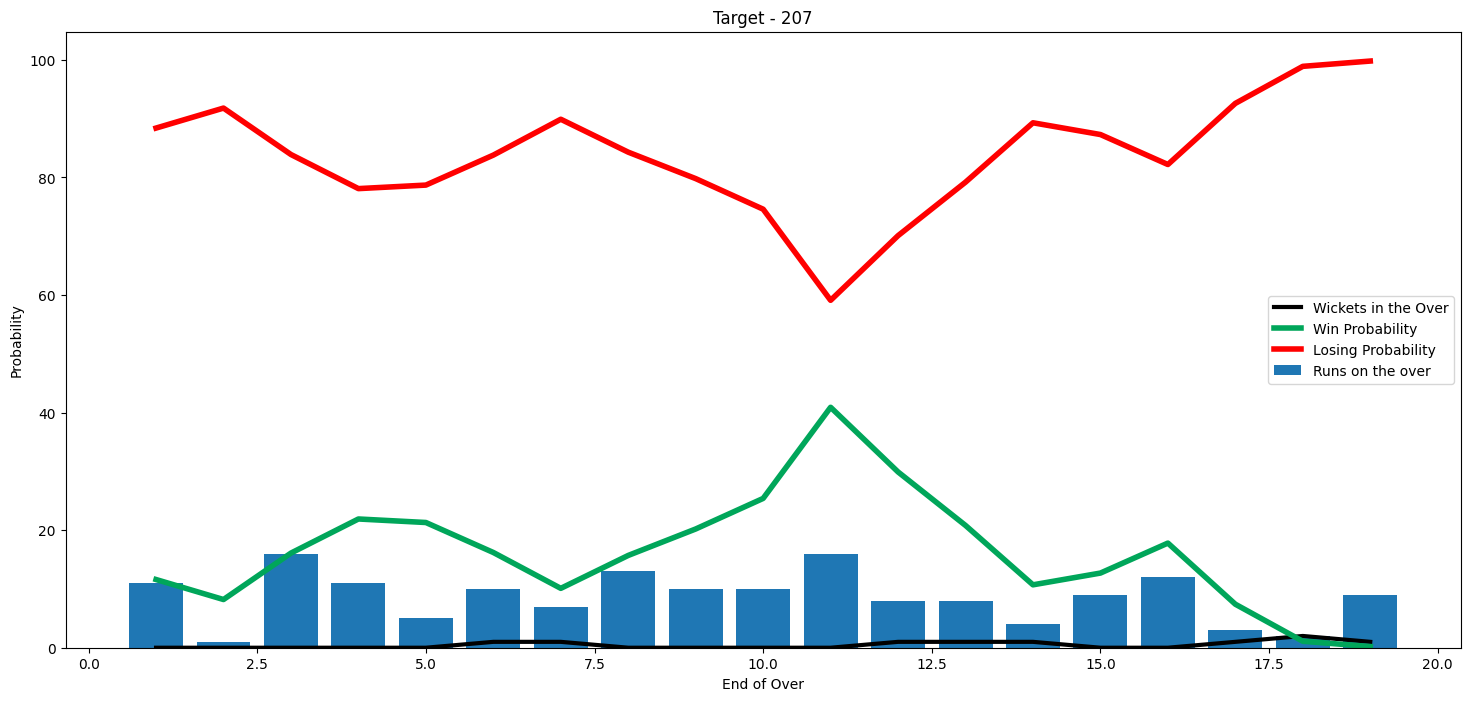

In [285]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18, 8))
plt.plot(temp_df['end_of_over'], temp_df['wickets_in_over'], color = 'black', linewidth = 3, label = 'Wickets in the Over' )
plt.plot(temp_df['end_of_over'], temp_df['win'], color = '#00a65a', linewidth = 4, label = 'Win Probability')
plt.plot(temp_df['end_of_over'], temp_df['lose'], color = 'red', linewidth = 4, label = 'Losing Probability')
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'], label = 'Runs on the over') 

plt.title('Target - ' + str(target))
plt.xlabel('End of Over')
plt.ylabel('Probability')

plt.legend()    # Showing the 'Label' values in the corner
plt.show()

In [286]:
# Plot of the match Number 74
temp_df, target = match_progression(delivery_df_2, 74, pipe)
temp_df

Target -  178


,end_of_over,runs_after_over,wickets_in_over,lose,win
13294,1,4,0,48.2,51.8
13302,2,8,0,42.3,57.7
13308,3,1,0,49.6,50.4
13314,4,7,1,62.1,37.9
13320,5,12,0,50.6,49.4
13326,6,13,0,37.7,62.3
13332,7,9,0,32.1,67.9
13340,8,15,0,19.7,80.3
13346,9,7,0,18.0,82.0
13353,10,17,0,9.1,90.9


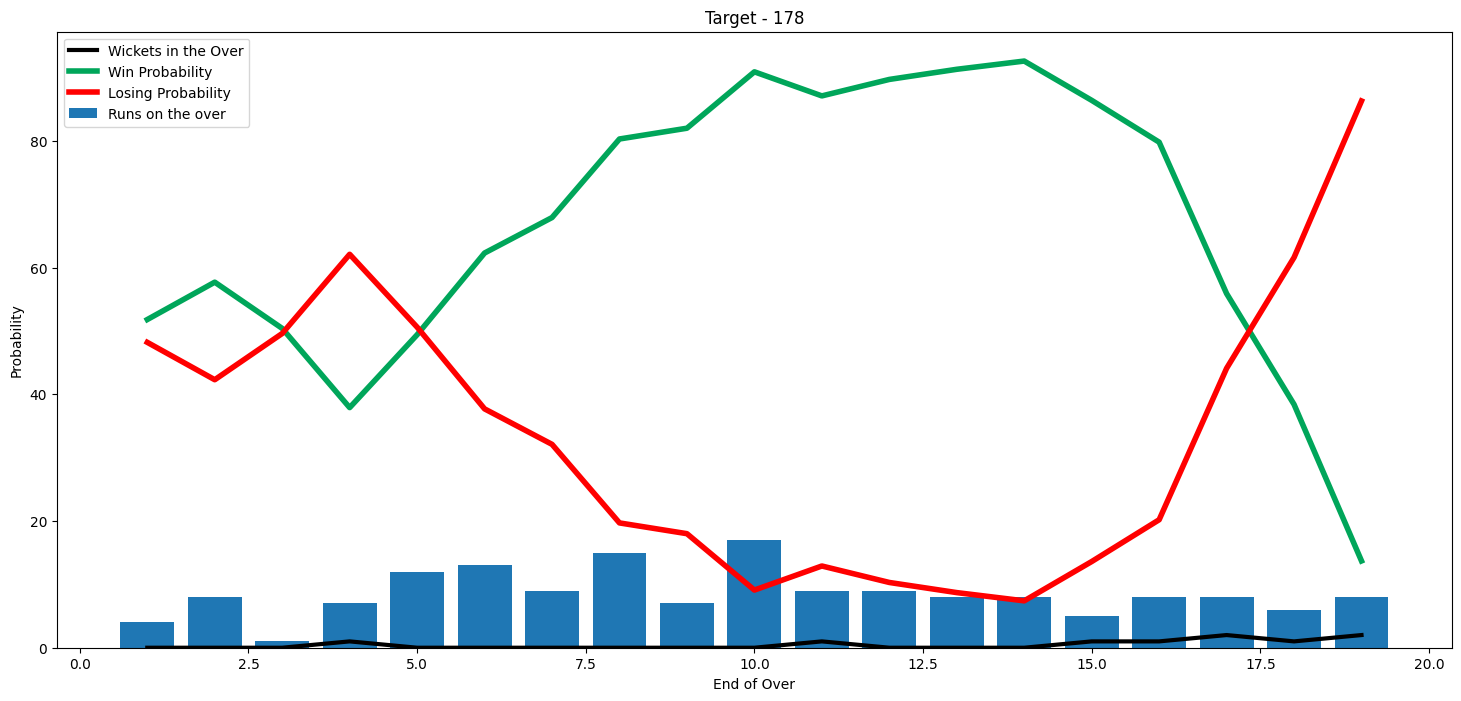

In [287]:
plt.figure(figsize = (18, 8))
plt.plot(temp_df['end_of_over'], temp_df['wickets_in_over'], color = 'black', linewidth = 3, label = 'Wickets in the Over' )
plt.plot(temp_df['end_of_over'], temp_df['win'], color = '#00a65a', linewidth = 4, label = 'Win Probability')
plt.plot(temp_df['end_of_over'], temp_df['lose'], color = 'red', linewidth = 4, label = 'Losing Probability')
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'], label = 'Runs on the over') 

plt.title('Target - ' + str(target))
plt.xlabel('End of Over')
plt.ylabel('Probability')

plt.legend()    # Showing the 'Label' values in the corner
plt.show()

In [288]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals',
 'Gujarat Titans',
 'Lucknow Super Giants']

In [289]:
# All the cities that all the matches are played
delivery_df_2['city'].unique()

array(['Hyderabad', 'Rajkot', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata',
       'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai', 'Cape Town',
       'Port Elizabeth', 'Durban', 'Centurion', 'East London',
       'Johannesburg', 'Kimberley', 'Bloemfontein', 'Ahmedabad',
       'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi', 'Visakhapatnam',
       'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan, 'Mohali',
       'Bengaluru'], dtype=object)

In [290]:
# Creating and opening the 'Pickle file'

import pickle
pickle.dump(pipe, open('pipe.pkl', 'wb'))   # wb -> write, bind
